# Export Data

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import hotstepper as hs
import hotstepper.samples as samples

<AxesSubplot:>

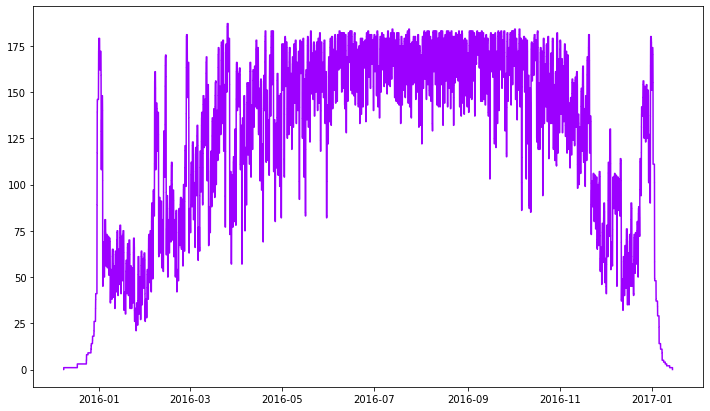

In [9]:
hotel_stays = samples.hotel_stays_sample()
hotel_stays.plot(figsize=(12,7))

Hotstepper has the ability to export step data, albeit the method reuses the same method a few times. In short, the ability to export data using the Pandas series structure will suit most use cases. All this can be done with a call the the **series()** method.

<AxesSubplot:>

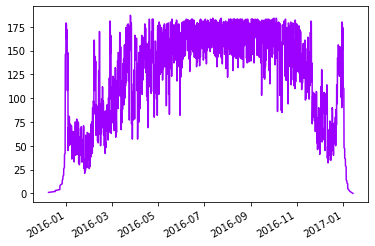

In [10]:
stays_series = hotel_stays.series()
stays_series.plot()

With a Pandas series object, we can quickly convert it to a dataframe

In [11]:
df_stays = stays_series.to_frame().reset_index()
df_stays.rename(columns={'index':'key',0:'value'},inplace=True)
df_stays

,key,value
0,2015-12-08 15:33:00,1.0
1,2015-12-17 14:19:00,2.0
2,2015-12-17 15:19:00,3.0
3,2015-12-23 14:02:00,4.0
4,2015-12-23 14:38:00,5.0
...,...,...
24880,2017-01-08 09:29:00,4.0
24881,2017-01-09 10:28:00,3.0
24882,2017-01-10 09:30:00,2.0
24883,2017-01-12 08:48:00,1.0


Or we can use the Pandas series to create a dictionary, to prove the dictionary is well structured, we can read it back in to confirm we land back were we started.

<AxesSubplot:>

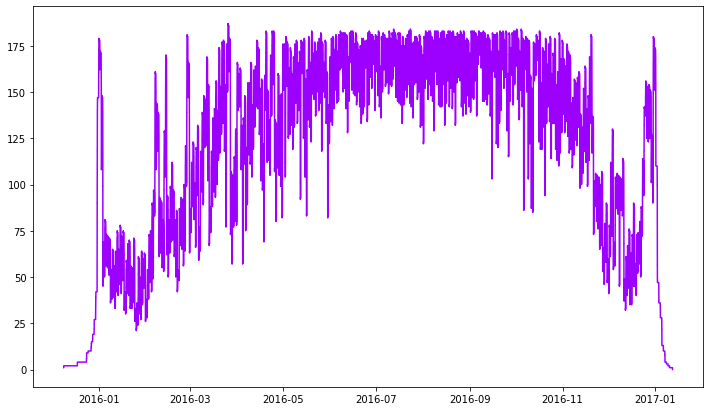

In [12]:
hotel_dict = hotel_stays.series().to_dict()

hotel_from_dict = hs.Steps.read_dict(hotel_dict)
hotel_from_dict.plot(figsize=(12,7))


What about other data fro HotStepper, well, the swiss army knife **series()** method actually has another trick, you can pass it other data as a parameter to get it in a Pandas Series object, from there, you can go to town.

<AxesSubplot:title={'center':'Step Values Histogram'}, xlabel='Steps Range'>

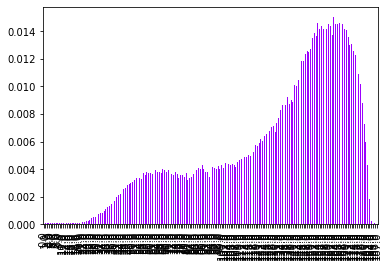

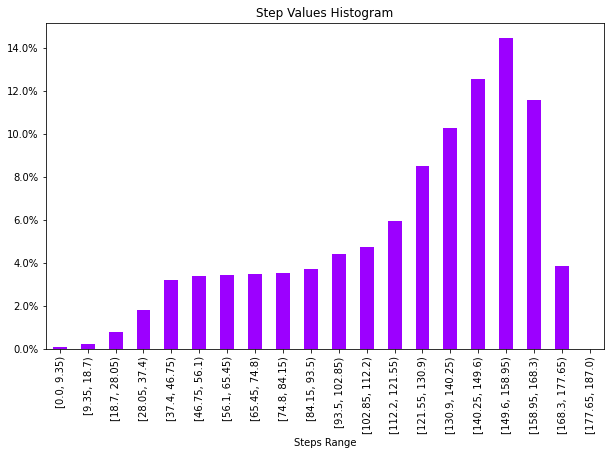

In [13]:
hotel_stays_histo_data = hotel_stays.series(hotel_stays.histogram())

#this is a Pandas Series object
hotel_stays_histo_data.plot(kind='bar')

#the original steps object
hotel_stays.histogram_plot(figsize=(10,6))

Once we have the data in a Pandas Series object, saving to multiple formats is as easy as calling the required method on the series object, for a list of output writers, [please see the docs](https://pandas.pydata.org/pandas-docs/stable/search.html?q=to_)

In [14]:
#save to csv for later
hotel_stays_histo_data.to_csv('hotel_histo_data.csv')